In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Dropped non-beneficial ID columns, 'EIN', 'NAME', and CLASSIFICATION
application_df_0 = application_df.drop(["EIN","NAME","CLASSIFICATION"],axis=1)
application_df_0

,APPLICATION_TYPE,AFFILIATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df_0.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df_0.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

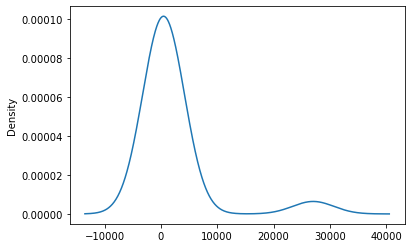

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application_counts = list(application_type_counts[application_type_counts<1000].index)

# Replace in dataframe
for app in replace_application_counts:
    application_df_0.APPLICATION_TYPE = application_df_0.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df_0.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Generate our categorical variable lists
application_cat = application_df_0.dtypes[application_df_0.dtypes == "object"].index.tolist()
application_cat


['APPLICATION_TYPE',
 'AFFILIATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [8]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df_0[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# Merge one-hot encoded features and drop the originals
application_df_0 = application_df_0[["STATUS","ASK_AMT","IS_SUCCESSFUL"]].merge(encode_df,left_index=True,right_index=True)
application_df_0.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
# Split our preprocessed data into our features and target arrays
y = application_df_0["IS_SUCCESSFUL"].values
X = application_df_0.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  70
hidden_nodes_layer2 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 70)                2450      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1420      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 3,891
Trainable params: 3,891
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_2/",exist_ok=True)
checkpoint_path = "checkpoints_2/weights.{epoch:02d}.hdf5"

In [15]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

In [16]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
 59/804 [=>............................] - ETA: 0s - loss: 0.6598 - accuracy: 0.6209  
Epoch 00001: saving model to checkpoints_2/weights.01.hdf5
159/804 [====>.........................] - ETA: 0s - loss: 0.6346 - accuracy: 0.6605
Epoch 00001: saving model to checkpoints_2/weights.01.hdf5
262/804 [========>.....................] - ETA: 0s - loss: 0.6228 - accuracy: 0.6756
Epoch 00001: saving model to checkpoints_2/weights.01.hdf5
365/804 [============>.................] - ETA: 0s - loss: 0.6150 - accuracy: 0.6851
Epoch 00001: saving model to checkpoints_2/weights.01.hdf5
466/804 [================>.............] - ETA: 0s - loss: 0.6097 - accuracy: 0.6912
Epoch 00001: saving model to checkpoints_2/weights.01.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.6059 - accuracy: 0.6955
Epoch 00001: saving model to checkpoints_2/weights.01.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6030 - accuracy: 0.6986
Epoch 00001: saving model to checkpoi

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5723 - accuracy: 0.7263
Loss: 0.5722825527191162, Accuracy: 0.7262973785400391


In [18]:
#SECOND TRY OPTIMIZING THE MODEL
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  70
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 10

nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_1.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
804/804 [==============================] - 1s 888us/step - loss: 0.6129 - accuracy: 0.6793
Epoch 2/50
804/804 [==============================] - 1s 887us/step - loss: 0.5721 - accuracy: 0.7261
Epoch 3/50
804/804 [==============================] - 1s 952us/step - loss: 0.5702 - accuracy: 0.7254
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5691 - accuracy: 0.7265
Epoch 5/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5713 - accuracy: 0.7286
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5678 - accuracy: 0.7272
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5678 - accuracy: 0.7272
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5657 - accuracy: 0.7321
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5654 - accuracy: 0.7312
Epoch 10/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5656 - accuracy: 

In [19]:
#THIRD TRY
# scale the column ASK_AMT
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler_1 = MinMaxScaler()
# fit and transform the data
df_norm_askamt = pd.DataFrame(scaler.fit_transform(application_df_0[["ASK_AMT"]]))

df_norm_askamt.columns = ["ASK_AMT_1"]
df_norm_askamt

,ASK_AMT_1
0,-0.031725
1,-0.030536
2,-0.031725
3,-0.031706
4,-0.030146
...,...
34294,-0.031725
34295,-0.031725
34296,-0.031725
34297,-0.031725


In [20]:
#combine the normalized ASK_AMT_1 to the application_df and drop the original ASK_AMT column
application_df_1 = df_norm_askamt.merge(application_df_0,left_index=True,right_index=True)
application_df_1.head()

,ASK_AMT_1,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,-0.031725,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.030536,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.031725,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.031706,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.030146,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
application_df_1.drop(columns = ["ASK_AMT"],inplace=True)
application_df_1.head()

,ASK_AMT_1,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,-0.031725,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.030536,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.031725,1,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.031706,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.030146,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# Split our preprocessed data into our features and target arrays
y = application_df_1["IS_SUCCESSFUL"].values
X = application_df_1.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
#THIRD TRY OPTIMIZING THE MODEL
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  70
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30

nn_2 = tf.keras.models.Sequential()

# First hidden layer
nn_2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_2.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5927 - accuracy: 0.7116
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5731 - accuracy: 0.7264
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5729 - accuracy: 0.7272
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5675 - accuracy: 0.7292
Epoch 5/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5658 - accuracy: 0.7309
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5715 - accuracy: 0.7241
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5688 - accuracy: 0.7278
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5662 - accuracy: 0.7315
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5713 - accuracy: 0.7261
Epoch 10/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5674 - accuracy: 0.7270

In [25]:
#Fourth Try
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [26]:
# Dropped non-beneficial ID columns, 'EIN', 'NAME'
application_df_2 = application_df.drop(["EIN","NAME"], axis=1)
application_df_2

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [27]:
# Determine the number of unique values in each column.
application_df_2.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [28]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df_2.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [29]:
# Determine which values to replace if counts are less than ...?
replace_application_counts = list(application_type_counts[application_type_counts<100].index)

# Replace in dataframe
for app in replace_application_counts:
    application_df_2.APPLICATION_TYPE = application_df_2.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df_2.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [30]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df_2.CLASSIFICATION.value_counts()
classification_counts.head(20)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

In [31]:
# Determine which values to replace if counts are less than ..?
replace_classification = list(classification_counts[classification_counts<150].index)

# Replace in dataframe
for cls in replace_classification:
    application_df_2.CLASSIFICATION = application_df_2.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df_2.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1003
C7000      777
C1700      287
C4000      194
Name: CLASSIFICATION, dtype: int64

In [32]:
# Generate our categorical variable lists
application_cat = application_df_2.dtypes[application_df_2.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [33]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df_2[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
# Merge one-hot encoded features and drop the originals
application_df_2 = application_df_2[["STATUS","ASK_AMT","IS_SUCCESSFUL"]].merge(encode_df,left_index=True,right_index=True)
application_df_2.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
# Split our preprocessed data into our features and target arrays
y = application_df_2["IS_SUCCESSFUL"].values
X = application_df_2.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:

# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 15 

nn_3 = tf.keras.models.Sequential()

# First hidden layer
nn_3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_3.fit(X_train_scaled, y_train, epochs=50,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
 56/804 [=>............................] - ETA: 0s - loss: 0.6705 - accuracy: 0.5977  
Epoch 00001: saving model to checkpoints_2/weights.01.hdf5
156/804 [====>.........................] - ETA: 0s - loss: 0.6410 - accuracy: 0.6506
Epoch 00001: saving model to checkpoints_2/weights.01.hdf5
259/804 [========>.....................] - ETA: 0s - loss: 0.6255 - accuracy: 0.6691
Epoch 00001: saving model to checkpoints_2/weights.01.hdf5
360/804 [============>.................] - ETA: 0s - loss: 0.6145 - accuracy: 0.6799
Epoch 00001: saving model to checkpoints_2/weights.01.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.6070 - accuracy: 0.6870
Epoch 00001: saving model to checkpoints_2/weights.01.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.6017 - accuracy: 0.6917
Epoch 00001: saving model to checkpoints_2/weights.01.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5973 - accuracy: 0.6955
Epoch 00001: saving model to checkpoin

In [38]:
# Export our model to HDF5 file
nn_3.save("AlphabetSoupCharity_Optimization.h5")